Basic Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [7]:
data = pd.read_excel("E:\coding\DEPI\insurance.xlsx")

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
data.shape

(1338, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the feature correlations

<Axes: >

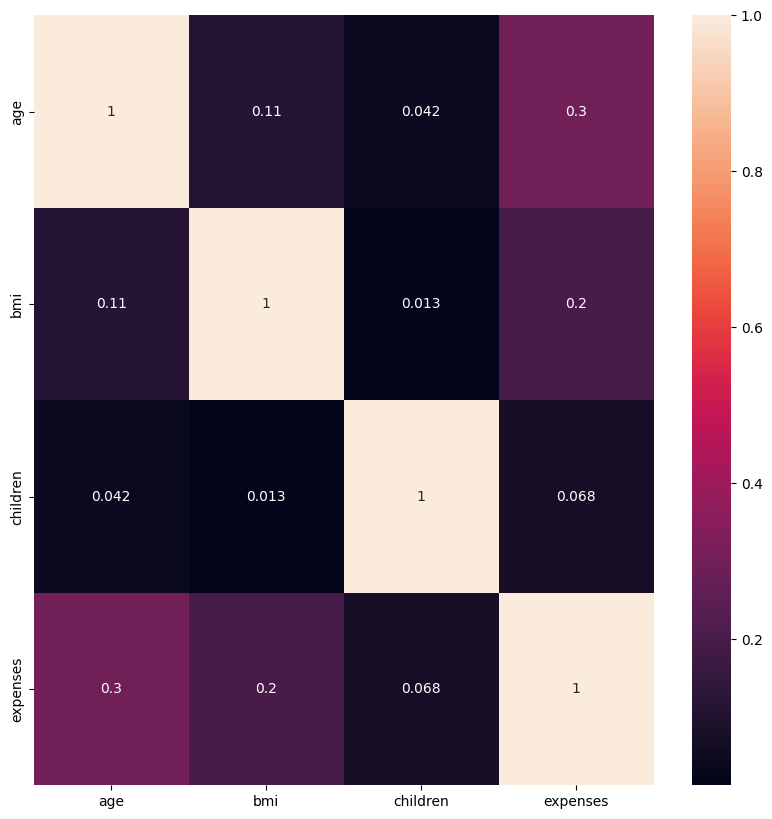

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Label Encode Object Types

In [13]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())
        print()

<======== sex ===========>
sex
male      676
female    662
Name: count, dtype: int64

<======== smoker ===========>
smoker
no     1064
yes     274
Name: count, dtype: int64

<======== region ===========>
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [24]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

Check info after Label Encoding

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


One hot Encoding 

In [26]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)

data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   expenses  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
 8   region_1  1338 non-null   float64
 9   region_0  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


Handle Skewness in Predictive column

In [28]:
Original_Y = data["expenses"].values.copy()

In [29]:
Original_Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36],
      shape=(1338,))

Skewness in Column : Expenses  1.51587966289798


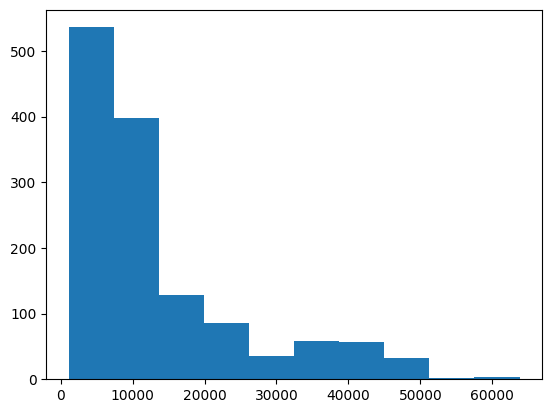

In [30]:
print("Skewness in Column : Expenses " , data["expenses"].skew())

plt.hist(data["expenses"])
plt.show()

Skewness in Column : Log Expenses  -0.0900974307762623


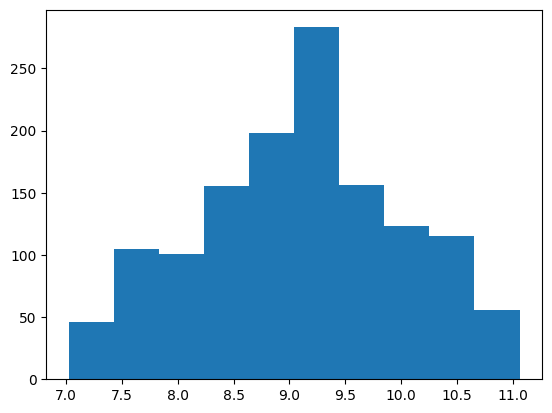

In [31]:
col_log = np.log(data["expenses"])
print("Skewness in Column : Log Expenses " , col_log.skew())

plt.hist(col_log)
plt.show()

Skewness in Column : Sqrt Expenses  0.7958625295340573


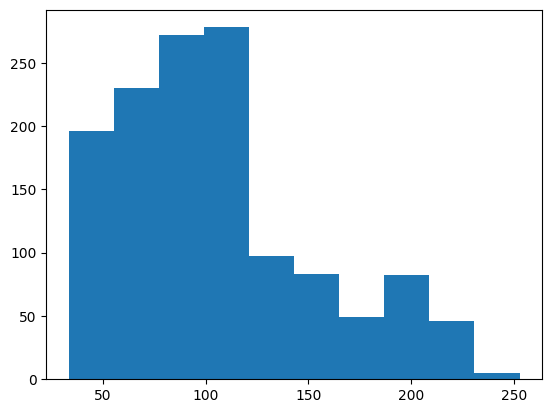

In [32]:
col_sqrt = np.sqrt(data["expenses"])

print("Skewness in Column : Sqrt Expenses " ,col_sqrt.skew())

plt.hist(col_sqrt)
plt.show()

Skewness in Column : boxcox Expenses  -0.008734092406187275


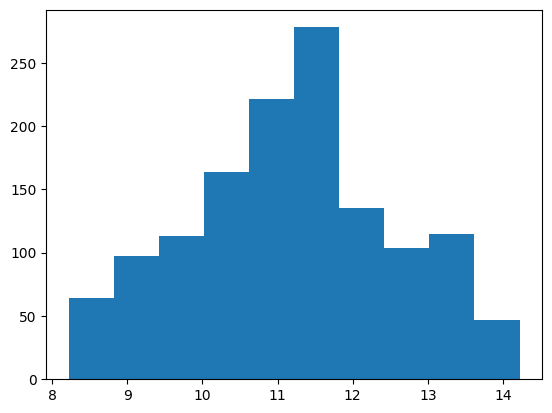

In [33]:
from scipy import stats 

col_cox , lam = stats.boxcox(data["expenses"])[0:2]
print("Skewness in Column : boxcox Expenses " ,pd.Series(col_cox).skew())

plt.hist(col_cox)
plt.show()

In [34]:
data["expenses"] = col_cox

Make Features and Targets

In [35]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

In [36]:
X = data[remaining_columns].values 
Y = data['expenses'].values

In [37]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [38]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [39]:
Xtrain.shape , Xtest.shape

((1070, 9), (268, 9))

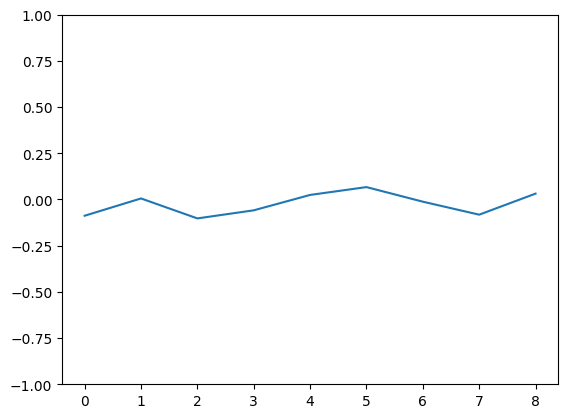

In [40]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

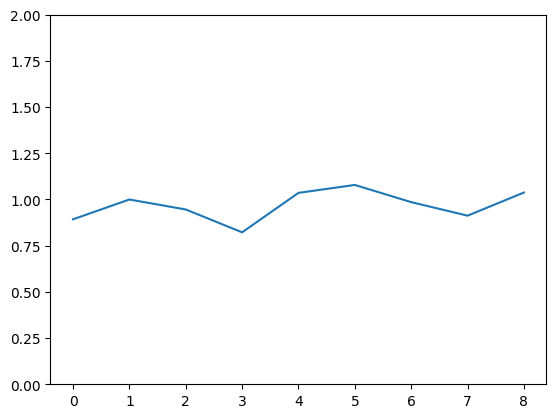

In [41]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

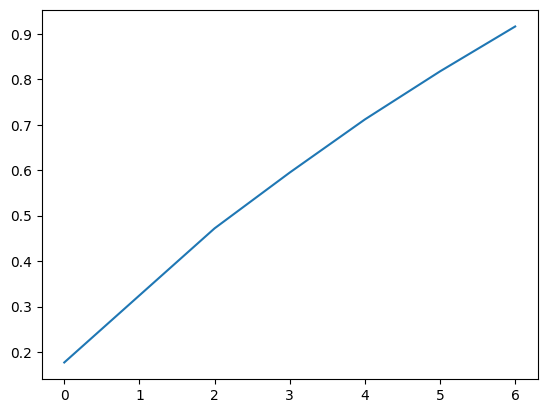

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
 
plt.plot(pca.explained_variance_ratio_.cumsum())

In [43]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)

LinearRegression()

In [44]:
model.coef_

array([ 0.1716415 ,  0.08197175,  0.02232378,  0.43355782,  0.54318198,
       -0.29099119,  0.94352284])

In [45]:
model.intercept_

np.float64(11.22177535629386)

In [46]:
model.coef_.dot(Xtest[10,:]) + model.intercept_

np.float64(9.853712894773306)

In [47]:
model.predict(Xtest[10,:].reshape(1,-1))

array([9.85371289])

In [48]:
model.score(Xtest , Ytest)

0.7497119088770732

Can we Bring back the data ?

In [49]:
from scipy.special import inv_boxcox

transformed_data = inv_boxcox(Y , lam)

In [50]:
transformed_data[:10]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14])

In [51]:
Original_Y[:10]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14])